In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Generate a sample of the data of 10k rows

In [51]:
full_data = pd.read_csv('sales_5000000.csv')

In [52]:
full_data['Order Date'].min(), full_data['Order Date'].max()

('2014-01-01', '2024-09-10')

In [ ]:
# data_sample = full_data.drop_duplicates(keep='first').sample(n=10000, random_state=42)
# data_sample.to_csv('sales_sample.csv', index=False)

### Load data

In [2]:
data = pd.read_csv('sales_sample.csv')

In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Federated States of Micronesia,Meat,Online,L,2020-05-08,869529092,2020-05-28,1836,421.89,364.69,774590.04,669570.84,105019.20
1,Sub-Saharan Africa,Tanzania,Office Supplies,Online,H,2019-03-11,536609017,2019-04-10,3388,651.21,524.96,2206299.48,1778564.48,427735.00
2,Europe,United Kingdom,Beverages,Online,H,2014-05-07,978356826,2014-05-18,6381,47.45,31.79,302778.45,202851.99,99926.46
3,Sub-Saharan Africa,Mozambique,Cosmetics,Offline,H,2016-10-18,306972014,2016-11-19,8696,437.20,263.33,3801891.20,2289917.68,1511973.52
4,Sub-Saharan Africa,Tanzania,Meat,Online,L,2021-05-14,916942393,2021-06-20,2486,421.89,364.69,1048818.54,906619.34,142199.20


In [4]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [7]:
for column in data.columns:
    data.rename(columns={column: column.replace(' ', '_').lower()}, inplace=True)   

In [8]:
catergorical_columns = ['region',
                        'country',
                        'item_type',
                        'sales_channel',
                        'order_priority']                       

numerical_columns = ['units_sold',
                     'unit_cost',
                     'unit_price',
                     'total_revenue',
                     'total_cost',
                     'total_profit']

In [9]:
# Add shipping duration column
data['shipping_duration_in_days'] = (pd.to_datetime(data['ship_date']) - pd.to_datetime(data['order_date'])).dt.days

In [10]:
def convert_shipping_duration_to_category(duration):
    if duration <= 3:
        return '1-3 days'
    elif duration < 5:
        return '3-5 days'
    else:
        return 'more than 5 days'

In [11]:
data['shipping_duration_category'] = data['shipping_duration_in_days'].apply(convert_shipping_duration_to_category)

In [14]:
# drop unnecessary columns
data.drop(columns=['order_id'], inplace=True)

In [53]:
data.to_csv('sales_sample_cleaned.csv', index=False)

In [13]:
data.columns

Index(['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date', 'order_id', 'ship_date', 'units_sold', 'unit_price',
       'unit_cost', 'total_revenue', 'total_cost', 'total_profit',
       'shipping_duration_in_days', 'shipping_duration_category'],
      dtype='object')

## EDA

## Univariate Analysis

## Catergorical features

In [15]:
def plot_category_count(data, feature,palette='viridis'):    
    plt.figure(figsize=(10, 8))

    # Count the values and compute percentages
    counts = data[feature].value_counts()
    percentages = counts / counts.sum() * 100

    # Plot the barplot
    ax = sns.barplot(x=counts.index, 
                    y=counts.values, 
                    hue=counts.index, 
                    dodge=False,
                    palette=palette)

    # Annotate the bars with percentages
    for i, (count, pct) in enumerate(zip(counts.values, percentages.values)):
        ax.text(i, count + 0.5, f'{pct:.1f}%', ha='center', va='bottom')

    plt.xticks(rotation=45)
    plt.title(feature)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


### Item Type

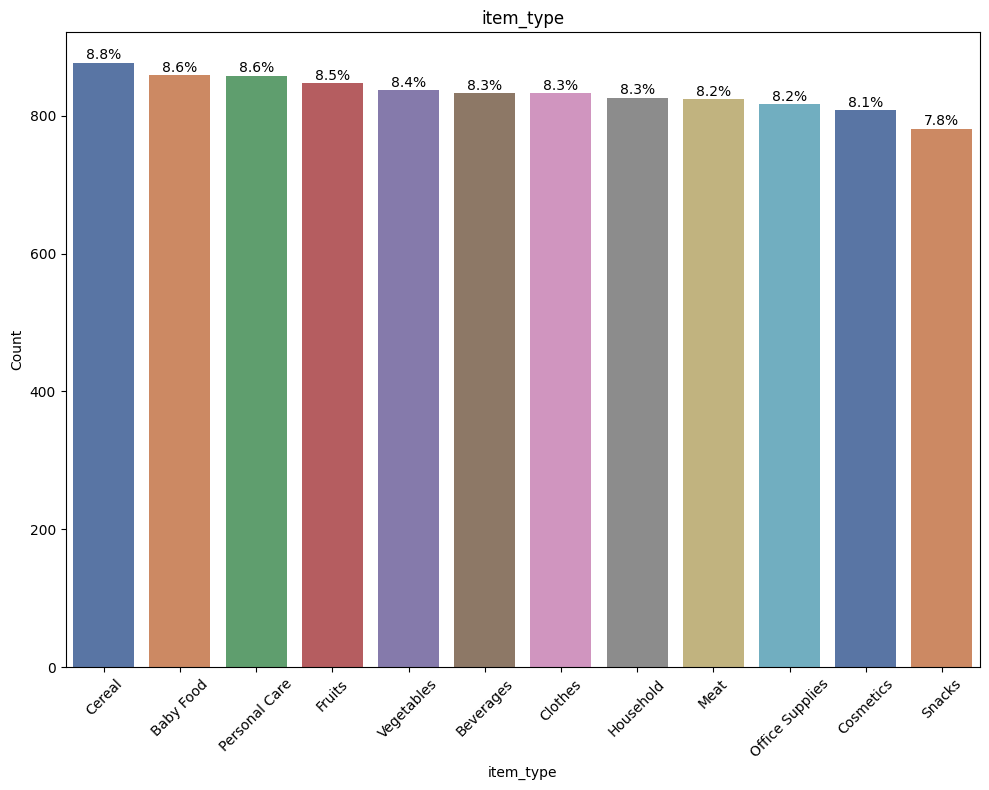

In [16]:
plot_category_count(data, "item_type","deep")

##### There are 12 unique item types in the dataset. The most popular item type is Cereal, followed by Baby Food, but all items have similar popularity.

### Region 

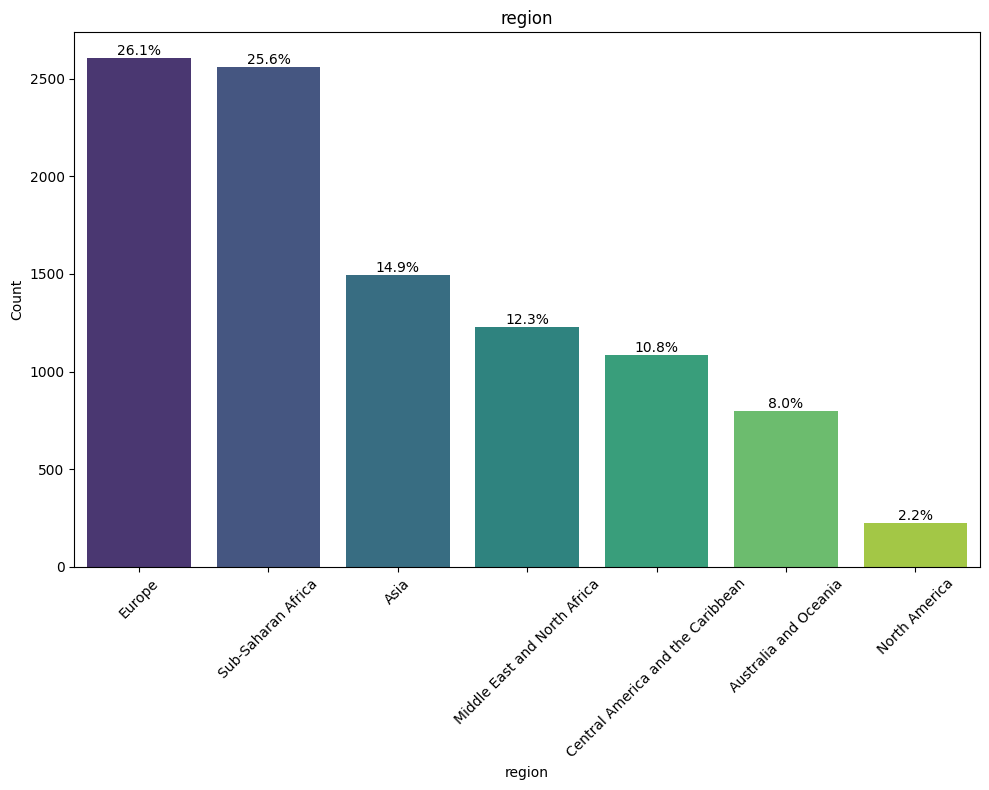

In [17]:
plot_category_count(data, 'region')

##### The sales have been made in 6 regions. Around 50% of the sales have been made in Europe And Sub-Saharan Africa and the least sales have been made in north america.

### Country

In [50]:
data['Country'].value_counts()

Country
Georgia                  71
India                    71
Hungary                  69
Bulgaria                 66
Solomon Islands          66
                         ..
Fiji                     41
Andorra                  41
Republic of the Congo    40
Slovenia                 39
Oman                     39
Name: count, Length: 185, dtype: int64

##### Sales have been made to 185 countries

### Sales Channel

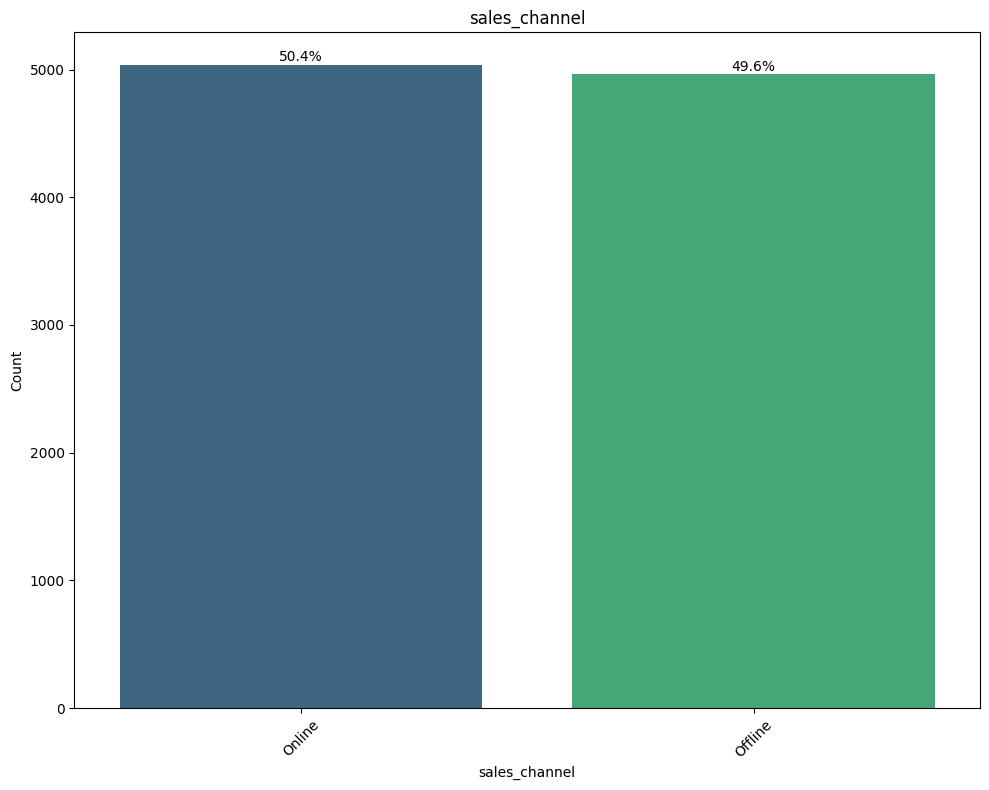

In [18]:
plot_category_count(data, 'sales_channel')

##### The Sales have been made through online and offline channels, both have almost equal distribution

### Order Priority

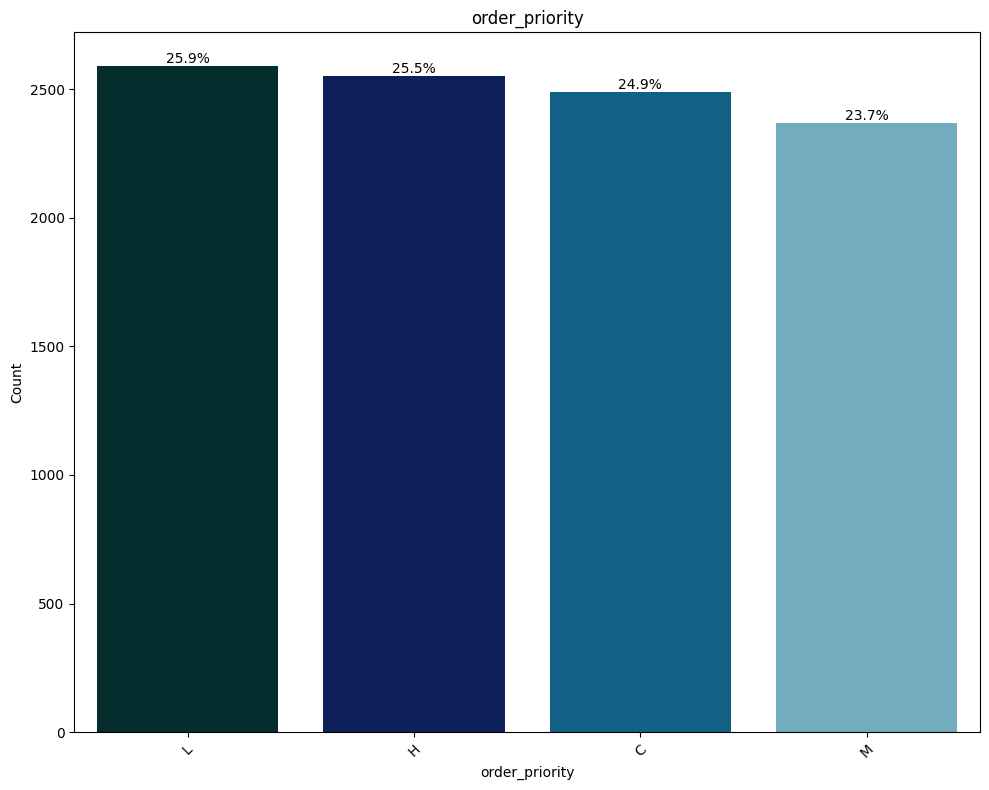

In [19]:
plot_category_count(data, 'order_priority', palette='ocean')

#### Order priority has 4 levels, all of them have similar percentages

## numerical features

In [20]:
def plot_numerical_distribution(data, feature):
    plt.figure(figsize=(10, 8))

    sns.histplot(data[feature])

    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Total Cost

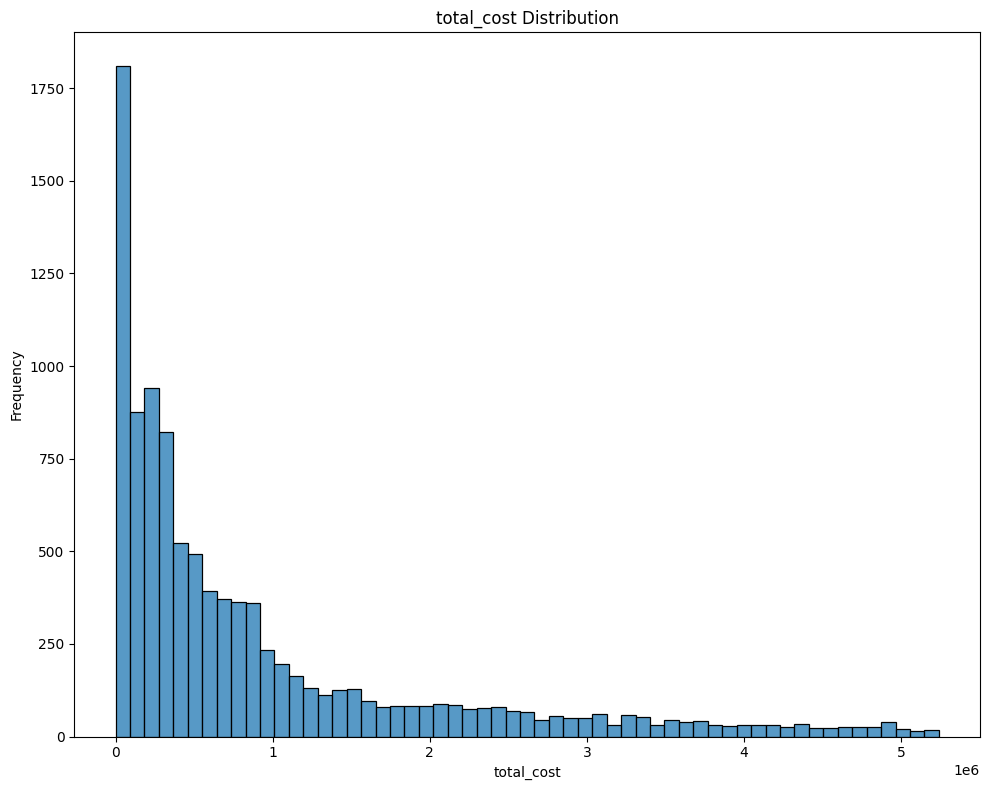

In [21]:
plot_numerical_distribution(data, 'total_cost')

### Total Revenue

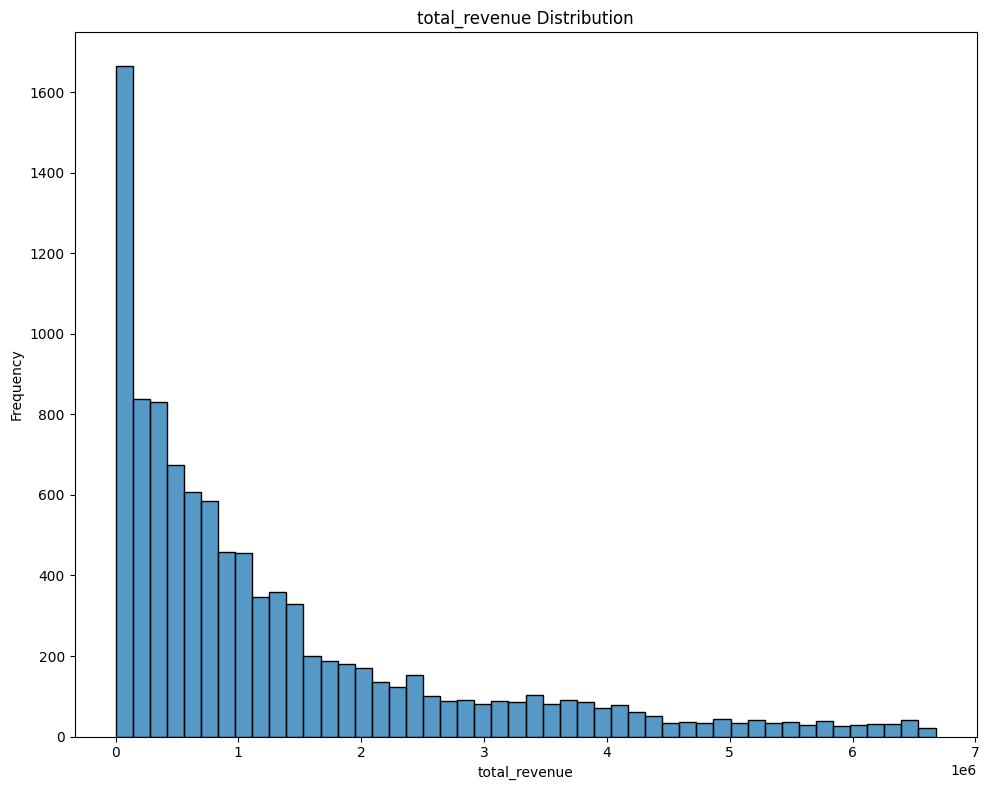

In [22]:
plot_numerical_distribution(data, 'total_revenue')

### Total Profit

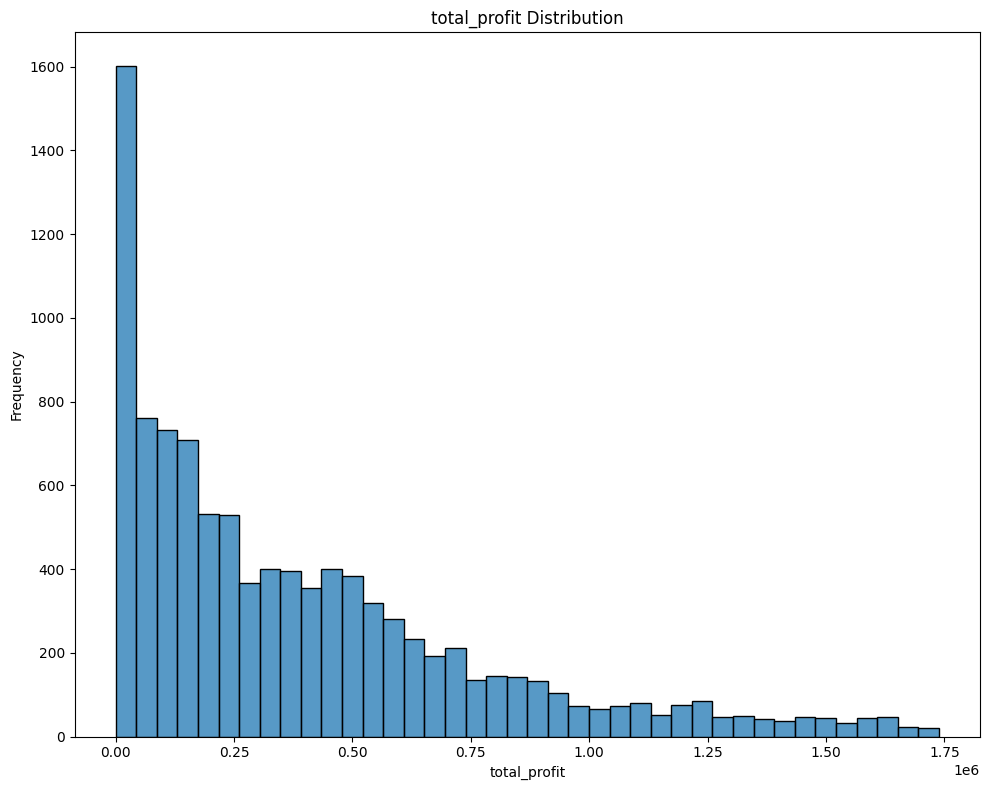

In [23]:
plot_numerical_distribution(data, 'total_profit')

##### Total revenue, total profit and total cost have power law distribution

### Units Sold

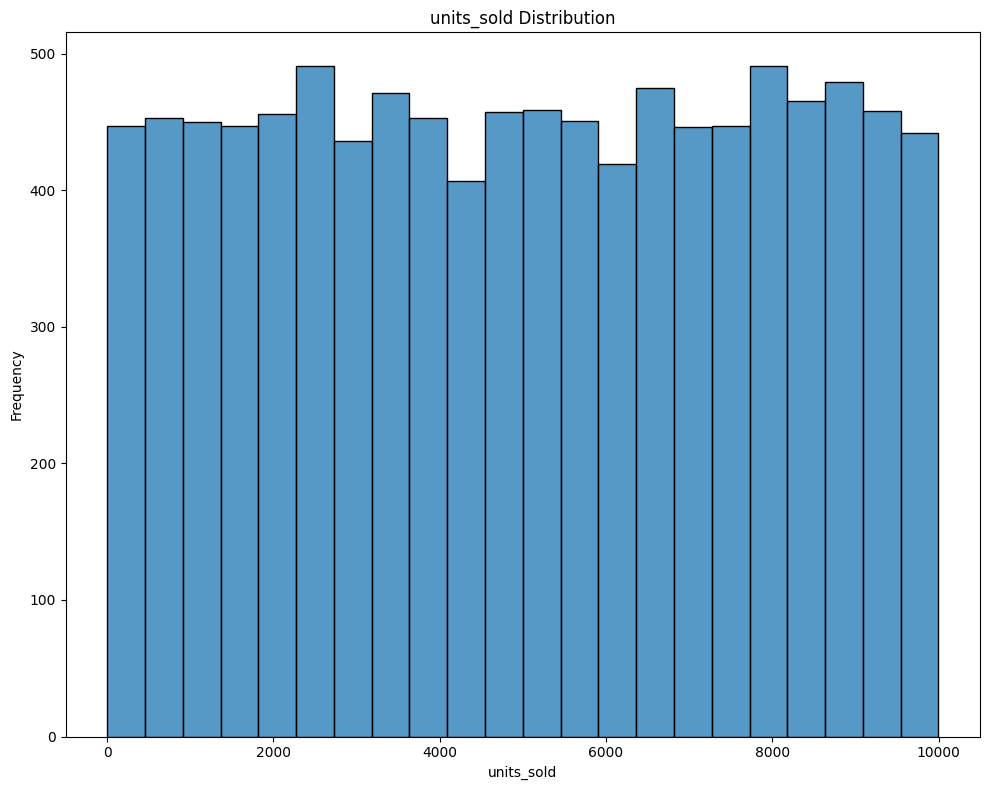

In [24]:
plot_numerical_distribution(data, 'units_sold')

##### number of sold units are varying from 0 to 10000

### Relationships between features

<Axes: >

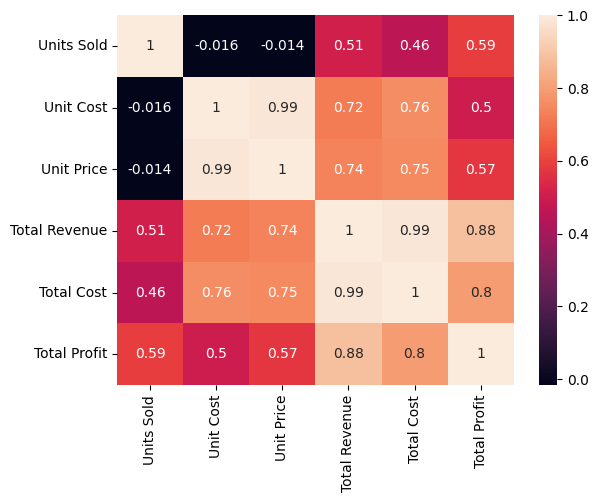

In [48]:
sns.heatmap(data[numerical_columns].corr(), annot=True)

##### As expected, there is a strong correlation between total_revenue and total_profit, also unit price and unit cost are linearly correlated.

In [25]:
def plot_relation_between_numerical_features(data, feature1, feature2):
    plt.figure(figsize=(10, 8))

    sns.scatterplot(x=feature1, y=feature2, data=data)

    plt.title(f'{feature1} vs {feature2}')
    plt.tight_layout()
    plt.show()

In [30]:
def plot_relation_between_caterogical_features(data, feature1, feature2):
    plt.figure(figsize=(10, 8))

    sns.countplot(x=feature1, hue=feature2, data=data)
    plt.xticks(rotation=45)
    plt.title(f'{feature1} vs {feature2}')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_relation_between_numerical_and_catergorical_features(data, feature1, feature2):
    plt.figure(figsize=(10, 8))

    sns.boxplot(x=feature1, y=feature2, data=data)

    plt.title(f'{feature1} vs {feature2}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Region & Order Proiority

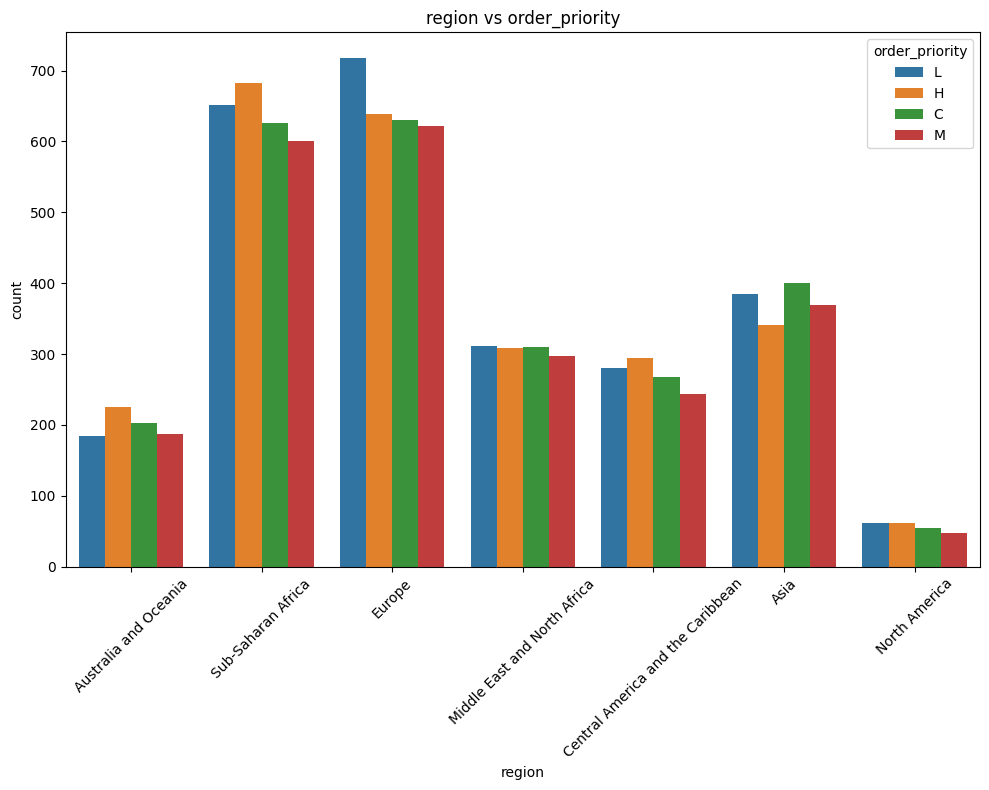

In [31]:
plot_relation_between_caterogical_features(data, 'region', 'order_priority')

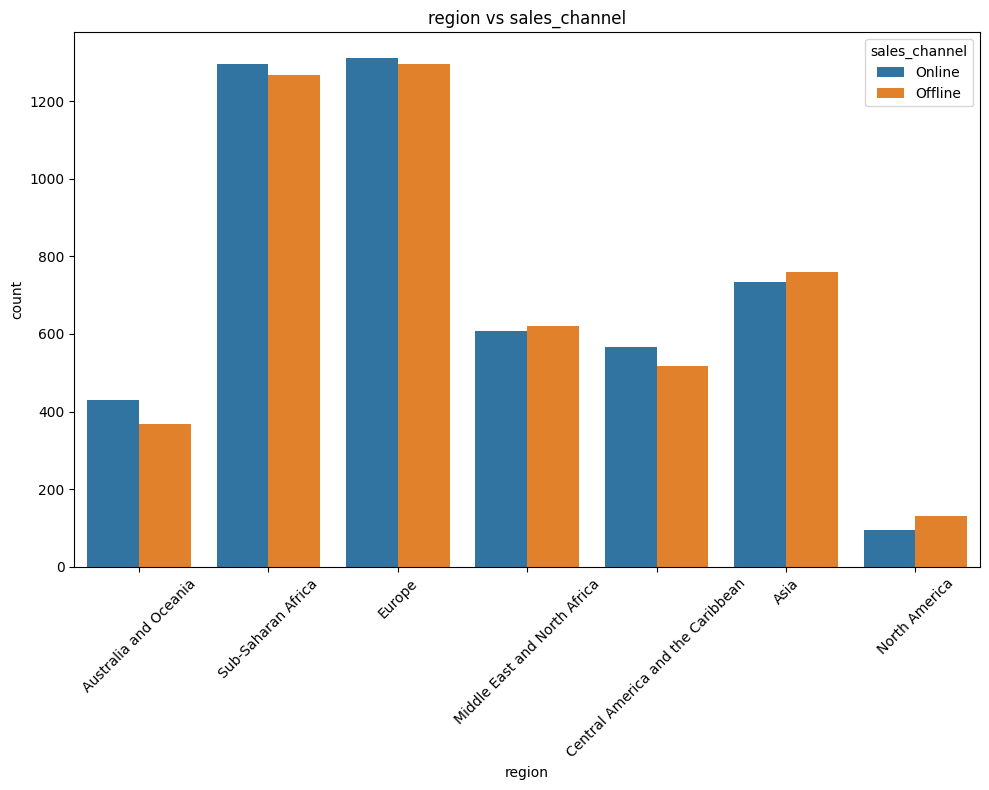

In [32]:
plot_relation_between_caterogical_features(data, 'region', 'sales_channel')

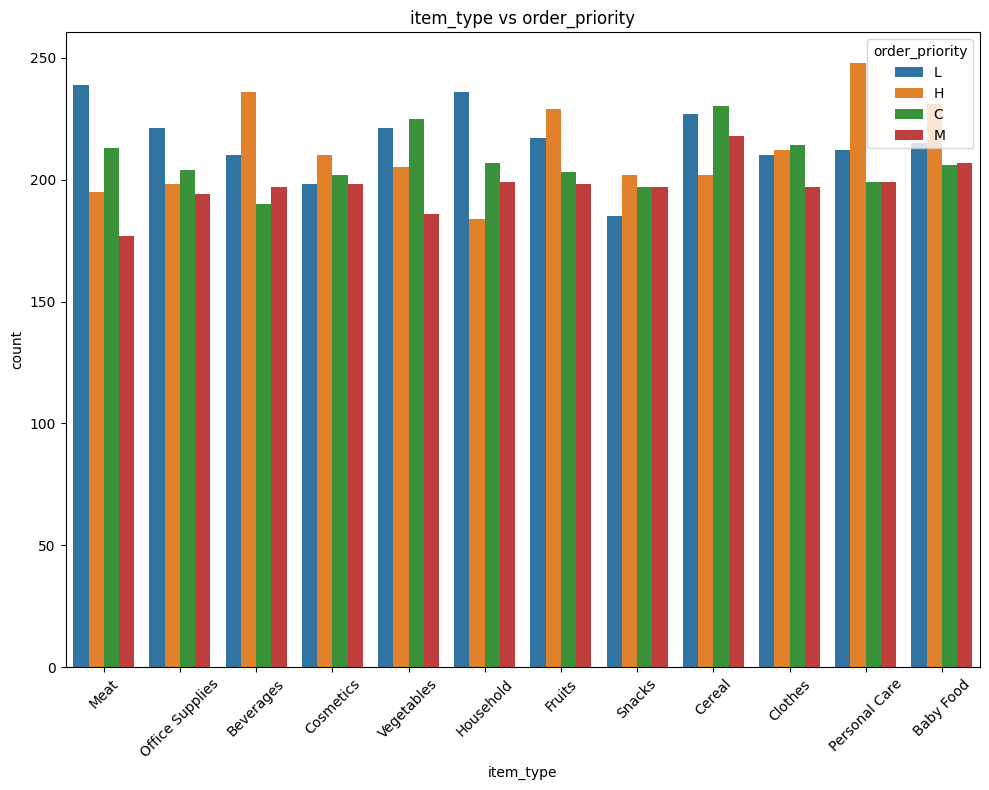

In [34]:
plot_relation_between_caterogical_features(data,'item_type','order_priority')

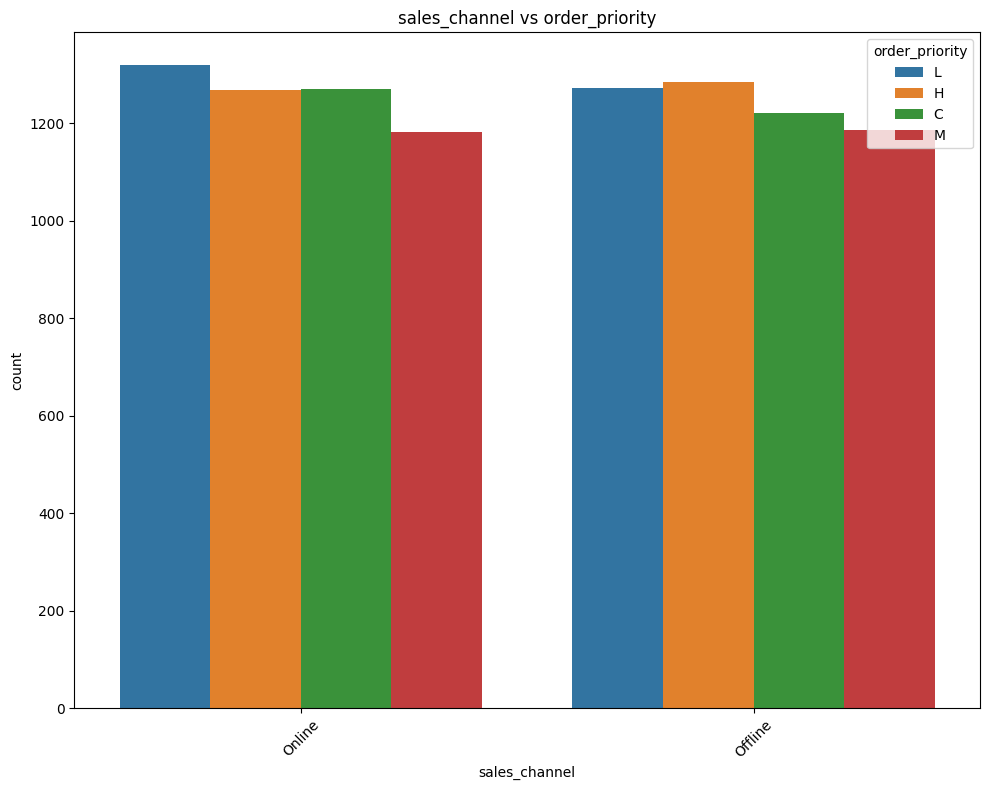

In [39]:
plot_relation_between_caterogical_features(data, 'sales_channel', 'order_priority')

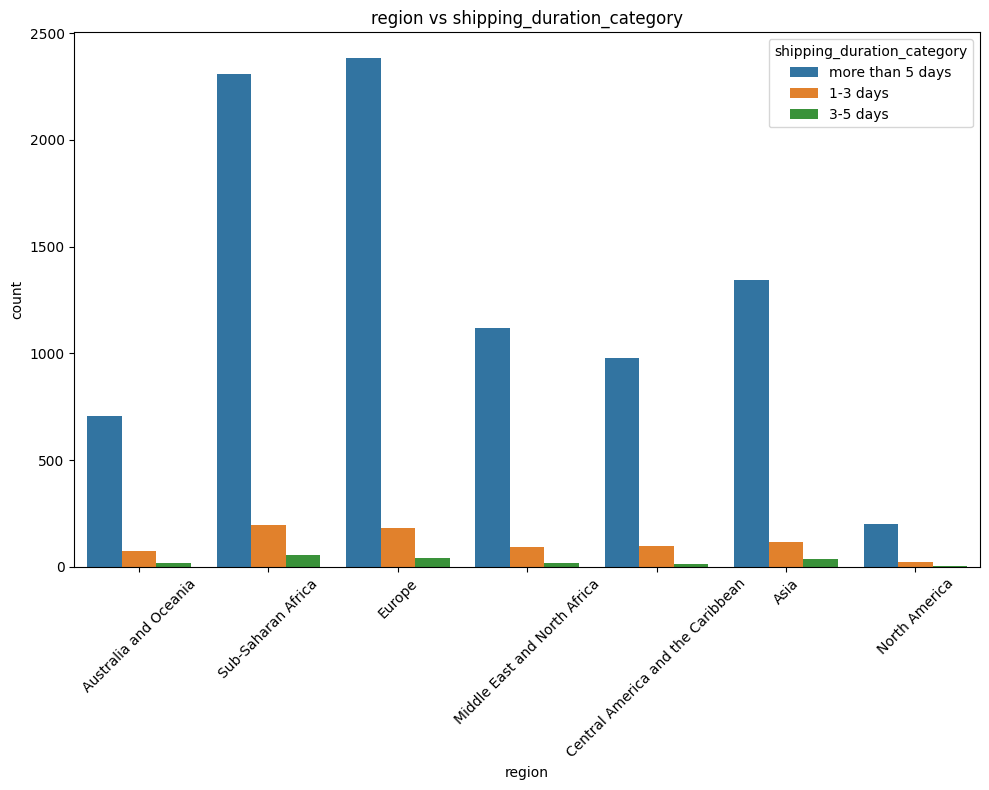

In [36]:
plot_relation_between_caterogical_features(data, 'region', 'shipping_duration_category')

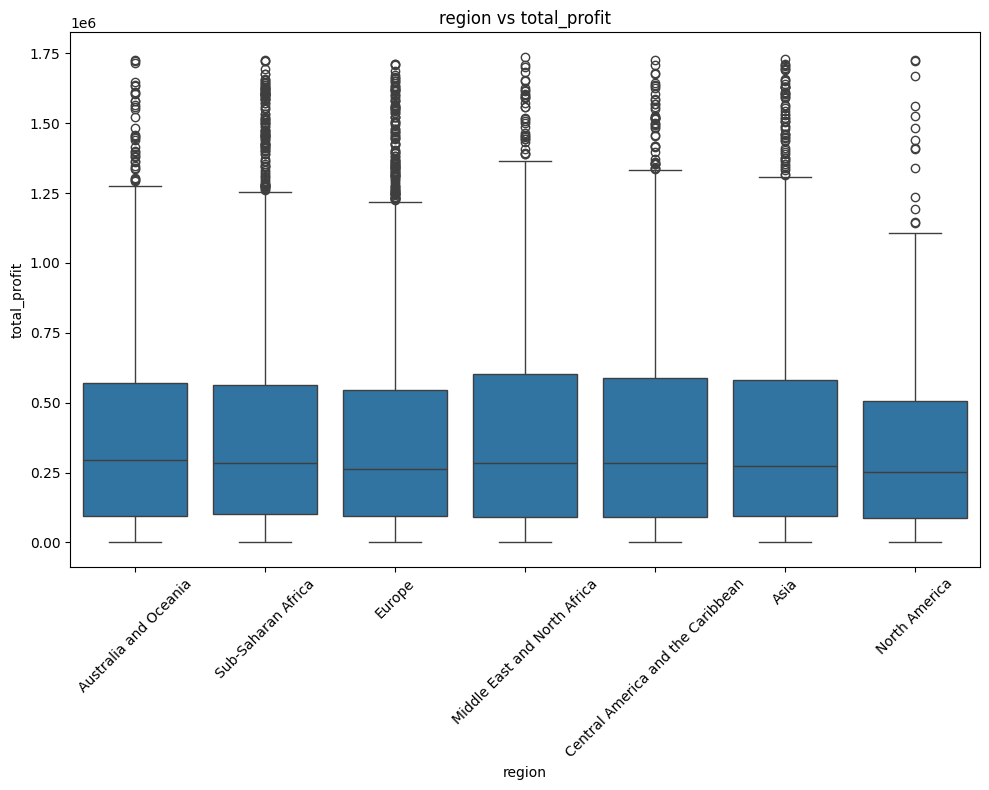

In [42]:
plot_relation_between_numerical_and_catergorical_features(data, 'region', 'total_profit')

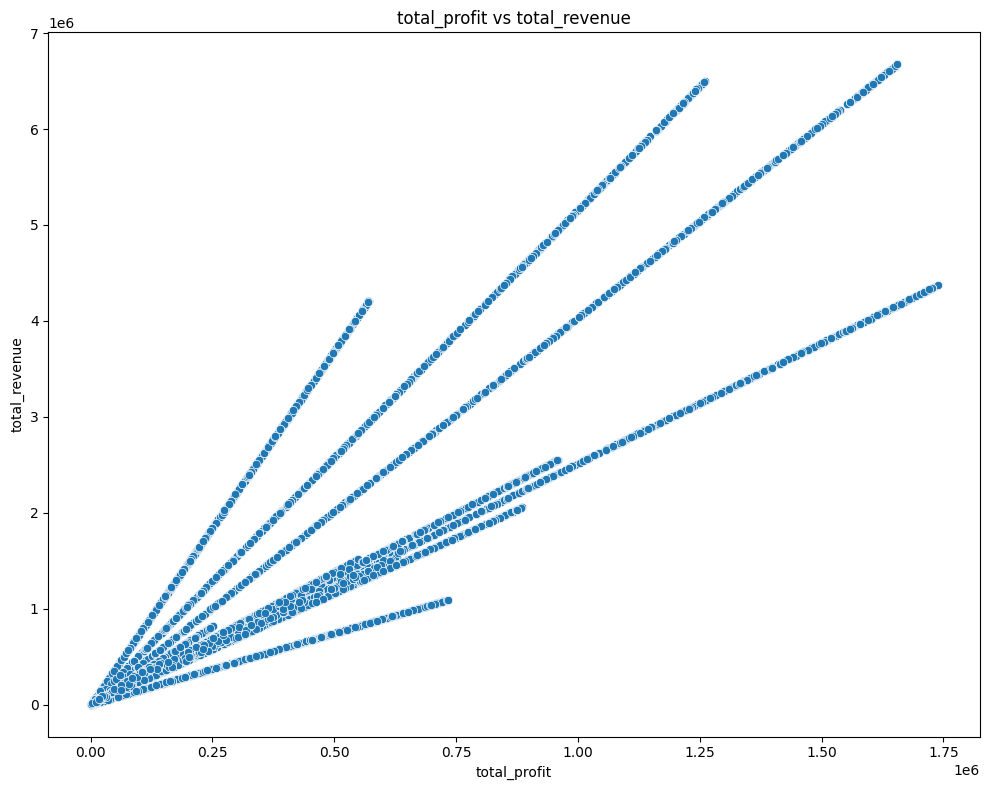

In [43]:
plot_relation_between_numerical_features(data, 'total_profit', 'total_revenue')

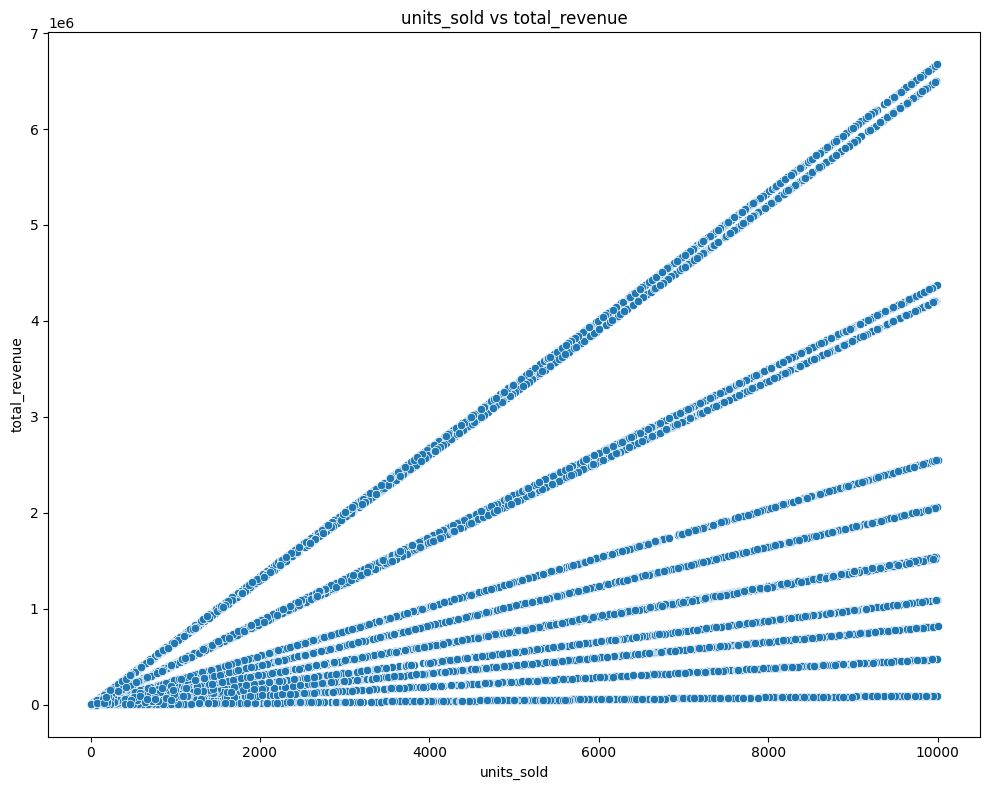

In [48]:
plot_relation_between_numerical_features(data, 'units_sold', 'total_revenue')

#### Main focus is on the total revenue column

In [44]:
data.groupby("region").agg({"total_profit": "sum"}).sort_values(by="total_profit", ascending=False)

,total_profit
region,
Sub-Saharan Africa,1.017756e+09
Europe,9.895840e+08
Asia,5.893936e+08
Middle East and North Africa,4.873662e+08
Central America and the Caribbean,4.313816e+08
Australia and Oceania,3.148942e+08
North America,8.407099e+07


In [45]:
data.groupby("sales_channel").agg({"total_profit": "sum"}).sort_values(by="total_profit", ascending=False)

,total_profit
sales_channel,
Online,1.988218e+09
Offline,1.926229e+09


In [47]:
data.groupby("item_type").agg({"total_profit": "sum"}).sort_values(by="total_profit", ascending=False)

,total_profit
item_type,
Cosmetics,7.321045e+08
Household,6.825660e+08
Office Supplies,5.037701e+08
Baby Food,4.107882e+08
Cereal,3.791614e+08
Clothes,3.075123e+08
Vegetables,2.664624e+08
Meat,2.301757e+08
Snacks,2.164951e+08
